# Tests. Spectrum/QNMs calculations. Standard and Hyperboloidal set-ups

**Standard setup**:
The equation we are interested in  is
\begin{equation}
(\partial_t^2-\partial_x^2 +V(x))\phi=0.
\end{equation}
Defining
$\psi=\partial_t \phi$ we get the first order in time, second order in
space reduced equation:
\begin{equation}
\partial_t \begin{pmatrix} \phi \\ \Psi \end{pmatrix} = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}\begin{pmatrix} \phi \\ \Psi \end{pmatrix}
\end{equation}
Let $u=(\phi, \Psi)^T$ then we can write the above equation as $\partial_t u = P u$ 
with \begin{equation} P = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}  \end{equation}
then applying the Fourier transform  (unitary angular frequency definition) we get, the equation $
Pu = i\omega u $
Thus, we are left with the Eigenvalue problem
\begin{equation}
M u = \omega u
\end{equation}
where
\begin{equation}
M= -i P \;\;\;
\end{equation}
In contrast the **hyperboloidal setup** is given in eq (3) of Jaramillo, Panosso-Macedo, Al-Sheik paper.
In this setup we have

\begin{align}
L u = \omega B u
\end{align}

Where $L$ is constructed from $L_1 = (1-y^2)((1-y^2)\partial_y^2 - 2y\partial_y) - V $ and $
L_2 = (1-y^2)(-2y\partial_y - 1)$ and $B$ is given by

\begin{equation}B = \begin{pmatrix} 0 & 1
\\ 0 & (1-y^2) \end{pmatrix} \end{equation}

In this form, posh-teller corresponds to $V = \gamma(1-y^2) $



In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from SpectrumCalculator import *

importing Jupyter notebook from SpectrumCalculator.ipynb


## Standard setup attempt

In [2]:
N = 16
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CG(N)[0]]
x = np.transpose(xt)
D1 = D1_CG(N)[1]
D2 = D2_CG(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
# Potential
# in Petarpa Boonsern and Matt Viser's paper Quasi-normal frequencies: key analytic results
# Let's test a known example in the standard setup: Posch-Teller 
V0=5.0
Vpt= V0*(1.0/np.cosh(x))**2

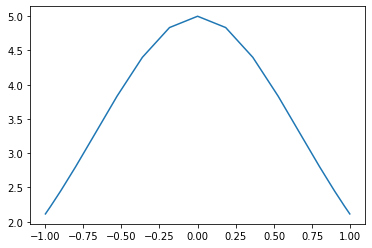

In [4]:
plt.plot(x,Vpt)

In [5]:
# Quick sanity checks:
# Checking Spectrum function with know examples.
#TestMatrix=Diagonal_Random_Matrix(N+1)
#TestMatrix;

In [6]:
#Spectrum(TestMatrix)
#plt.plot(Spectrum(-1j*TestMatrix).real, Spectrum(-1j*TestMatrix).imag,'ro')

In [7]:
# CirculantMatrix= np.array([[0,1,0,0,0], [0,0,1,0,0] ,[0,0,0,1,0] ,[0,0,0,0,1] ,[1,0,0,0,0]] )
# Example taken from Pseudospectra_lectures_EmbreeCarden.pdf 
#plt.plot(Spectrum(CirculantMatrix).real, Spectrum(CirculantMatrix).imag,'ro')

In [8]:
#Testing code with Standard setup
# as described above with posch-teller potential
Pcorner=D2-Vpt*Id

In [9]:
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
M=-1j*P

In [10]:
Spectrum(M);

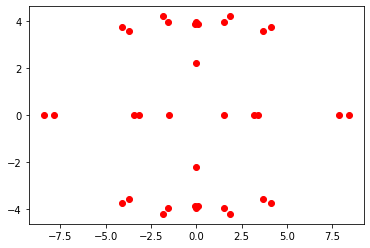

In [11]:
plt.plot(Spectrum(M).real, Spectrum(M).imag,'ro')
#Complete failure

## Hyperboloidal setup

In [12]:
# Checking spectrum with the hyperboloidal setup

In [13]:
# Elementary Operators Version 2
alpha, beta, gamma = 0., 0., 1.
print("alpha =", alpha, ", beta =", beta, ", gamma =", gamma)
V = alpha + beta*x + gamma*(1-x**2) 
L1 = (1-x**2)*((1-x**2)*D2 - 2*x*D1) - V*Id 
L2 = (1-x**2)*(-2*x*D1 - Id)
#EG: why don't we divide all by (1-x**2) for posch-teller. # EG: Understood now
Bu = np.concatenate((Id,Zero), axis=1)
Bd = np.concatenate((Zero,(1-x**2)*Id), axis=1)
B = np.concatenate((Bu,Bd), axis=0)
# EG: why is B chosen like this # EG: Understood now


Lu = np.concatenate((Zero,Id), axis=1)
Ld = np.concatenate((L1,L2), axis=1)
L = np.concatenate((Lu,Ld), axis=0)
    
     
L = -1j*L

alpha = 0.0 , beta = 0.0 , gamma = 1.0


In [14]:
#Spectrum(L);
#plt.plot(Spectrum(L).real, Spectrum(L).imag,'ro')

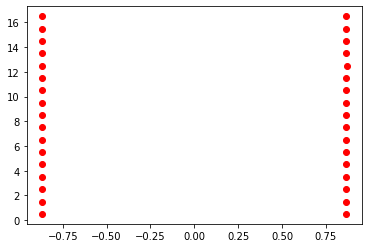

In [15]:
SpectrumAlt(L,B);
CorrectAnswer = plt.plot(SpectrumAlt(L,B).real, SpectrumAlt(L,B).imag,'ro')
# Ok so B seems to fix things. Why is B introduced? Why is the generalised eigenvalue problem needed?

## Insisting on standard setup. 
### Trying to impose outgoing boundary conditions at finite radius

In [16]:
# Let's get back to the standard non hyperboloidal problem.
# Let's see if we impose outgoing boundary conditions we get the correct spectrum

# We want to impose (D phi)_0 = -i w phi_0  and (D phi)_N = i w phi_N


In [17]:
Pcorner=D2-Vpt*Id
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
M=-1j*P

<img src="files/BoundaryCondition_Tests.jpg" width="600">

In [18]:
# In the last image z = x and c=-1, d=1.

Pmod=P

# we modify the first n=N+1, elements of the first line and susbtitute that for the corresponding line
# of the diferentiation operator. This is to have (D phi)_0 on the left-hand side
Pmod[0][0:n] = D1[0]
# we modify the first n=N+1, elements of the N-th line and susbtitute that for the corresponding line
# of the diferentiation operator. This is to have (D phi)_N on the left-hand side.
Pmod[N][0:n]= D1[N]

Id_total_mod = Id_total

# we modify the first n=N+1, elements of the first line by (1, 0,0,0,0,...,0). 
# This is to have -i w phi_0 on the right-hand side
Id_total_mod[0][0:n]= np.concatenate((np.ones(1),np.zeros(N)))
# we modify the first n=N+1, elements of the N-th line by (0, 0,0,0,0,...,0,-1). 
# This is to have i w phi_N on the right-hand side
Id_total_mod[N][0:n]= np.concatenate((np.zeros(N),-np.ones(1)))

M_mod=-1j*Pmod

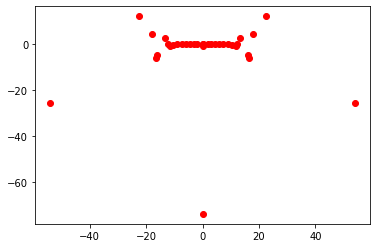

In [19]:
SpectrumAlt(M_mod,Id_total_mod);
plt.plot(SpectrumAlt(M_mod,Id_total_mod).real, SpectrumAlt(M_mod,Id_total_mod).imag,'ro')

In [20]:
# Is this ameliorated if we map the interval (-1,1) to (-a,a) with a>0?

Consider a linear tranformation to transform the interval $[-1,1]$ to $[c,d]$. 

Taking    
\begin{equation}
z = \frac{c+d}{2} + \bigg(\frac{d-c}{2}\bigg)x
\end{equation}
we map $\; \;$ $x \in [-1,1]$ $\;\;$ to $\; \;$ $z \in [c,d]$.

The inverse map is given by
\begin{equation}
x = \frac{c+d}{c-d} - \bigg(\frac{2}{c-d}\bigg)z
\end{equation}
Similarly the derivatives are related via.
\begin{equation}
D_z  = \frac{dx}{dz} D_x  \;\; \text{namely} \;\; D_z  =  \bigg(\frac{2}{d-c}\bigg) D_x 
\end{equation}
Similarly,
\begin{equation}
D_x  = \frac{dz}{dx} D_z  \;\; \text{namely} \;\; D_x  =  \bigg(\frac{d-c}{2}\bigg) D_z 
\end{equation}



In [21]:
N = 16
n=N+1
# Spectral Differentiation, identity and Zero matrices
xt =  [D1_CG(N)[0]]
x = np.transpose(xt)
D1 =  D1_CG(N)[1]
D2 =  D2_CG(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

########## rescaling domain ######
# x in (-1 , 1), z in  (c , d)

c = -500 #Large distance
d = 500 #Large distance
z =(c+d)/2 + (d-c)/2*x
D1_z= (2/(d-c))*D1
D2_z = ((2/(d-c))**2) * D2

In [22]:
V0= 1.0
Vpt= V0*(1.0/np.cosh(z))**2

Pcorner=D2_z-Vpt*Id
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
M=-1j*P


<img src="files/BoundaryCondition_Tests.jpg" width="600">

In [24]:
Pmod=P
Pmod[0][0:n] = D1_z[0]
Pmod[N][0:n]= D1_z[N]
Id_total_mod = Id_total
Id_total_mod[0][0:n]= np.concatenate((np.ones(1),np.zeros(N)))
Id_total_mod[N][0:n]= np.concatenate((np.zeros(N),-np.ones(1)))
M_mod=-1j*Pmod

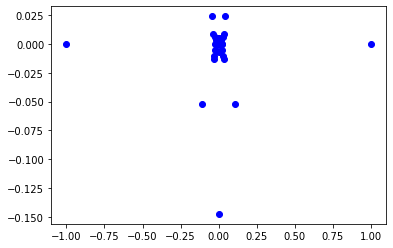

In [25]:
SpectrumAlt(M_mod,Id_total_mod);
#plt.xlim((-1,1))
#plt.ylim((-10,10))
ImposingFiniteRadiusBC=plt.plot(SpectrumAlt(M_mod,Id_total_mod).real, SpectrumAlt(M_mod,Id_total_mod).imag,'bo')